In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import re

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import numpy as np
import fbprophet
from fbprophet import Prophet
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime

import logging

from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import Ridge


logging.getLogger().setLevel(logging.ERROR)
from sklearn.preprocessing import PolynomialFeatures

from sklearn import neighbors
from sklearn.ensemble import AdaBoostRegressor

from sqlalchemy import create_engine
from sqlalchemy import(Table, Column, String, Integer, Boolean)
from sqlalchemy import MetaData, Table

import os
import matplotlib.dates as mdates

In [25]:

df_results = pd.read_csv('results_16years.csv')
df_results.index = pd.to_datetime(df_results['Unnamed: 0'])
df_results = df_results.iloc[:, 1:]
df_results.head()

,results,K
Unnamed: 0,,
2006-11-06,8249.809407,23
2006-11-07,8405.595221,67
2006-11-08,8550.478951,67
2006-11-09,8734.672011,67
2006-11-10,9032.324878,25


In [26]:

df_results = df_results.astype(float)
df_results = df_results.resample('B').mean()


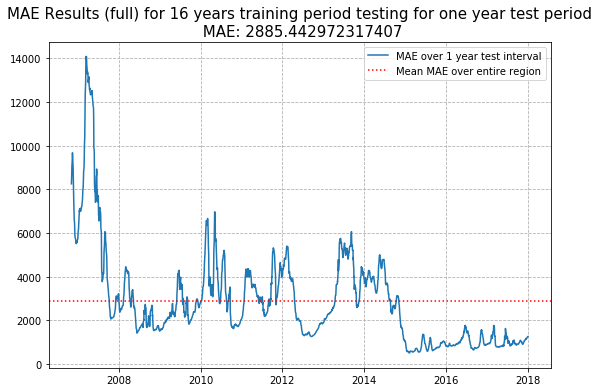

In [27]:
rcParams['figure.figsize'] = 9, 6


plt.plot(df_results['results'])
plt.title('MAE Results (full) for 16 years training period testing for one year test period\n ' + 'MAE: '+ str(df_results['results'].mean()), fontsize=15)
plt.axhline(df_results['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test.png'

plt.savefig(filename)
plt.show()

In [20]:
df_results2 = df_results[df_results.index.year>2014]
print('MAE for 2015-2018 testing:', df_results2['results'].mean())

MAE for 2015-2018 testing: 923.5747109355794


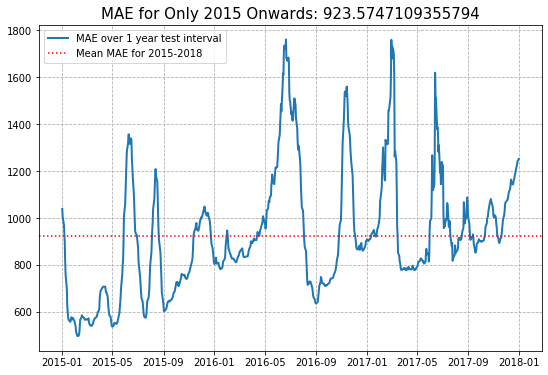

In [19]:
plt.plot(df_results2['results'], linewidth=2)
plt.grid(linestyle='dashed')
plt.title('MAE for Only 2015 Onwards: ' + str(df_results2['results'].mean()), fontsize=15)
plt.axhline(df_results2['results'].mean(), color='red', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE for 2015-2018'])

filename = 'results/KNN_16yr_train-1yr_test_from_2015.png'
plt.savefig(filename)

plt.show()

In [30]:
df_results = pd.read_csv('2yearpred_results.csv')
df_results.index = pd.to_datetime(df_results['Unnamed: 0'])
df_results = df_results.iloc[:, 1:]
df_results.head()


df_results = df_results.astype(float)
df_results = df_results.resample('B').mean()



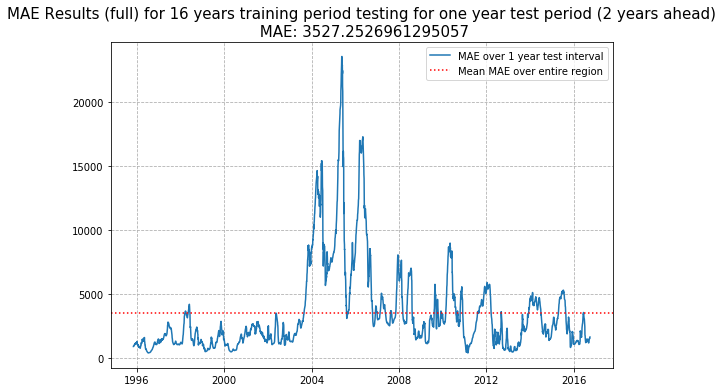

In [31]:
rcParams['figure.figsize'] = 9, 6


plt.plot(df_results['results'])
plt.title('MAE Results (full) for 16 years training period testing for one year test period (2 years ahead)\n ' + 'MAE: '+ str(df_results['results'].mean()), fontsize=15)
plt.axhline(df_results['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test.png'

# plt.savefig(filename)
plt.show()

MAE for 2015-2018 testing: 2499.545560430653


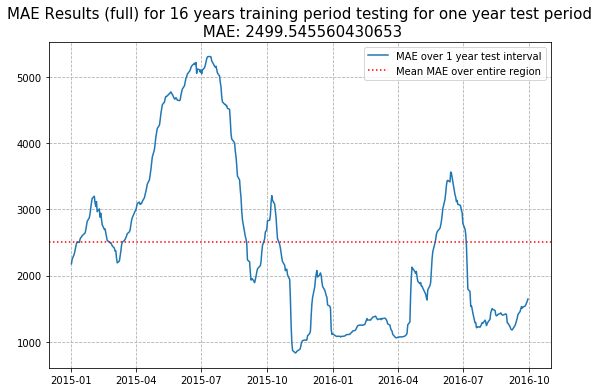

In [32]:
df_results2 = df_results[df_results.index.year>2014]
print('MAE for 2015-2018 testing:', df_results2['results'].mean())

rcParams['figure.figsize'] = 9, 6


plt.plot(df_results2['results'])
plt.title('MAE Results (full) for 16 years training period testing for one year test period\n ' + 'MAE: '+ str(df_results2['results'].mean()), fontsize=15)
plt.axhline(df_results2['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test2yearsahead.png'

#plt.savefig(filename)
plt.show()



In [33]:
df_results = pd.read_csv('results_with_inventory.csv')
df_results.index = pd.to_datetime(df_results['Unnamed: 0'])
df_results = df_results.iloc[:, 1:]
df_results.head()


df_results = df_results.astype(float)
df_results = df_results.resample('B').mean()



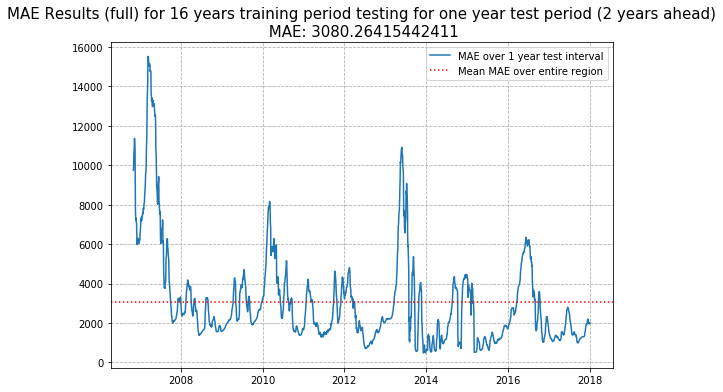

In [34]:
rcParams['figure.figsize'] = 9, 6


plt.plot(df_results['results'])
plt.title('MAE Results (full) for 16 years training period testing for one year test period (2 years ahead)\n ' + 'MAE: '+ str(df_results['results'].mean()), fontsize=15)
plt.axhline(df_results['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test.png'

# plt.savefig(filename)
plt.show()

MAE for 2015-2018 testing: 2156.201788763883


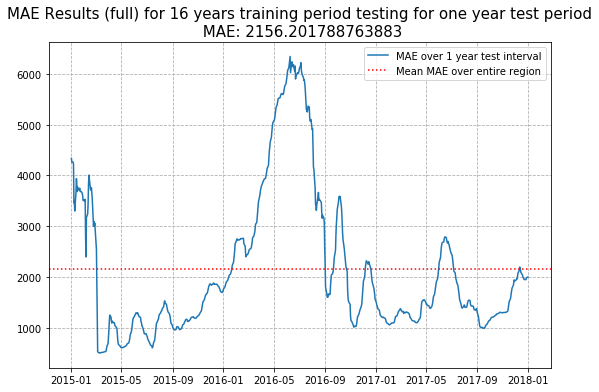

In [35]:
df_results2 = df_results[df_results.index.year>2014]
print('MAE for 2015-2018 testing:', df_results2['results'].mean())

rcParams['figure.figsize'] = 9, 6


plt.plot(df_results2['results'])
plt.title('MAE Results (full) for 16 years training period testing for one year test period\n ' + 'MAE: '+ str(df_results2['results'].mean()), fontsize=15)
plt.axhline(df_results2['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test2yearsahead.png'

#plt.savefig(filename)
plt.show()



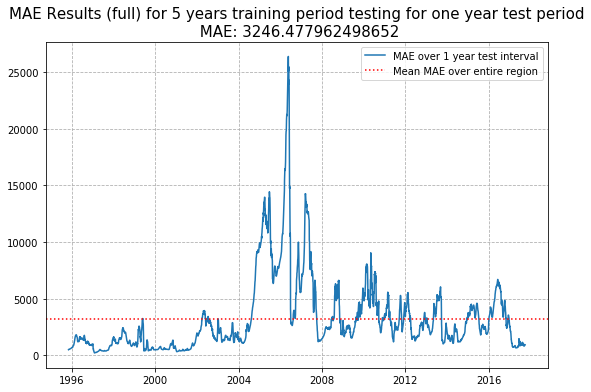

In [37]:
df_results = pd.read_csv('results5yearrr.csv')
df_results.index = pd.to_datetime(df_results['Unnamed: 0'])
df_results = df_results.iloc[:, 1:]
df_results.head()


df_results = df_results.astype(float)
df_results = df_results.resample('B').mean()

rcParams['figure.figsize'] = 9, 6


plt.plot(df_results['results'])
plt.title('MAE Results (full) for 5 years training period testing for one year test period\n ' + 'MAE: '+ str(df_results['results'].mean()), fontsize=15)
plt.axhline(df_results['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test.png'

# plt.savefig(filename)
plt.show()

MAE for 2015-2018 testing: 3093.779457350029


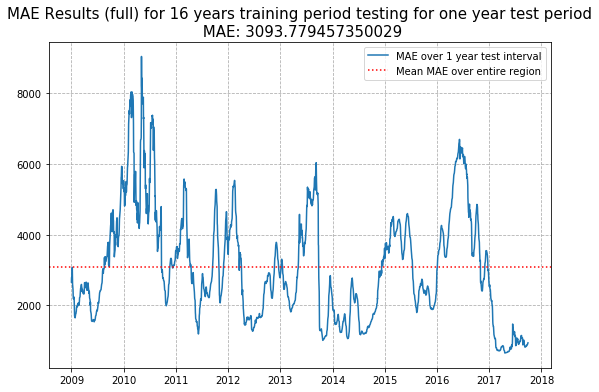

In [40]:
df_results2 = df_results[df_results.index.year>2008]
print('MAE for 2015-2018 testing:', df_results2['results'].mean())

rcParams['figure.figsize'] = 9, 6


plt.plot(df_results2['results'])
plt.title('MAE Results (full) for 16 years training period testing for one year test period\n ' + 'MAE: '+ str(df_results2['results'].mean()), fontsize=15)
plt.axhline(df_results2['results'].mean(), color='r', linestyle='dotted')
plt.legend(['MAE over 1 year test interval', 'Mean MAE over entire region'])
plt.grid(linestyle='dashed')



filename = 'results/KNN_16yr_train-1yr_test2yearsahead.png'

#plt.savefig(filename)
plt.show()

